In [0]:
%tensorflow_version 2.x

import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
class ANN():
  def __init__(self, n_input, n_output, hidden_size=-1):
    if hidden_size < 0:
      hidden_size = n_input
  
    self.w1 = np.random.randn(n_input+1, hidden_size)
    self.w2 = np.random.randn(hidden_size, n_output)

  def feedforward(self, x):
    xn = ANN.append_bias(x)
    h1 = ANN.activate( np.matmul(xn, self.w1) )
    h2 = ANN.activate( np.matmul(h1, self.w2) )
    
    return h2

  def predict(self, x):
    return np.argmax(self.feedforward(x), axis=1)

  def backpropagation(self, x, y, learning_rate=0.01):
    y_feed = self.feedforward(x)
    delta_out = (y - y_feed) * ANN.derivative(y_feed)

    xn = ANN.append_bias(x)
    h = ANN.activate(np.matmul(xn, self.w1))

    delta_w2 = np.matmul(h.T, delta_out)

    delta_hidden = np.matmul(delta_out, self.w2.T) * ANN.derivative(h)
    delta_w1 = np.matmul(xn.T, delta_hidden)

    wn1 = self.w1 + learning_rate * delta_w1
    wn2 = self.w2 + learning_rate * delta_w2

    return wn1, wn2

  def train(self, x, y, epoch=100, learning_rate=0.01):
    w1_list = np.zeros(np.append([epoch+1], list(self.w1.shape)))
    w2_list = np.zeros(np.append([epoch+1], list(self.w2.shape)))
    loss_list = np.zeros((epoch,))
    accuracy_list = np.zeros((epoch,))

    w1_list[0] = self.w1
    w2_list[0] = self.w2

    for i in range(epoch):
      wn1, wn2 = self.backpropagation(x, y, learning_rate=learning_rate)

      self.w1 = wn1
      self.w2 = wn2

      prediction = self.predict(x)

      w1_list[i+1] = wn1
      w2_list[i+1] = wn2

      yr = np.argmax(y, axis=1)

      loss_list[i] = ANN.loss(prediction, yr)
      accuracy_list[i] = ANN.accuracy(prediction, yr)
    
    return w1_list, w2_list, loss_list, accuracy_list
  
  def append_bias(x):
    return np.concatenate([np.zeros((x.shape[0], 1)), x], axis=1)

  def activate_sigmoid(x):
    return 1 / (1 + np.exp(-x))

  def activate(x, f=activate_sigmoid):
      return f(x)

  def loss_mse(y_star, y):
    return np.sum(np.power(y_star - y, 2)) * (1/y.shape[0])
  
  def loss_cross_entropy(y_star, y):
    return np.sum( y * np.log(1e-15 + y_star) )

  def loss(y_star, y, f=loss_cross_entropy):
    return f(y_star, y)

  def accuracy(y_star, y):
    return np.sum(y_star == y) / y.shape[0]
  
  def derivative_sigmoid(x):
    return x * (1-x)

  def derivative(x, f=derivative_sigmoid):
    return f(x)

In [0]:
def convert_ground_truth(y, n_class=10):
  result = np.zeros((y.shape[0], n_class))

  for i in range(y.shape[0]):
    result[i, y[i]] = 1

  return result

In [0]:
xr_train = x_train.reshape((x_train.shape[0], x_train.shape[1]*x_train.shape[2]))
xr_test = x_test.reshape((x_test.shape[0], x_test.shape[1]*x_test.shape[2]))

yr_train = convert_ground_truth(y_train)
yr_test = convert_ground_truth(y_test)

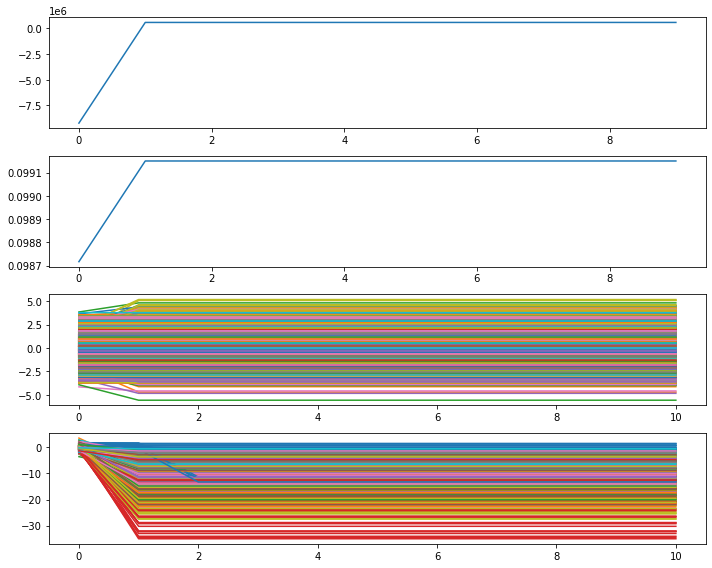

In [6]:
ann = ANN(784, 10, hidden_size=50)

w1, w2, loss, acc = ann.train(xr_train, yr_train, epoch=10, learning_rate=0.01)

plt.figure(figsize=(10,8))

plt.subplot(4,1,1)
plt.plot(loss)
plt.subplot(4,1,2)
plt.plot(acc)

plt.subplot(4,1,3)
plt.plot(w1.reshape((w1.shape[0], w1.shape[1]*w1.shape[2])))
plt.subplot(4,1,4)
plt.plot(w2.reshape((w2.shape[0], w2.shape[1]*w2.shape[2])))

plt.tight_layout()

In [28]:
print("Ground Truths: {}".format(y_train[0:5]))
print("Predicted labels: {}".format(ann.predict(xr_train[0:5])))

Ground Truths: [5 0 4 1 9]
Predicted labels: [9 9 9 9 9]


In [30]:
train_result = ann.predict(xr_train)
train_accuracy = np.sum(train_result == np.argmax(yr_train, axis=1)) / train_result.shape[0]
prnt("Prediction Accuracy on Training set: {}".format(train_accuracy))

0.09915

In [32]:
test_result = ann.predict(xr_test)
test_accuracy = np.sum(test_result == np.argmax(yr_test, axis=1)) / test_result.shape[0]

print("Prediction Accuracy on Test set: {}".format(test_accuracy))

Prediction Accuracy on Test set: 0.1009
